In [1]:
import torch
from evaluator import *
from torchvision.utils import save_image, make_grid
import matplotlib.pyplot as plt
import tqdm
from models import *
import json
import os
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


In [2]:
generator = torch.load("./generator.pt", map_location=device)
discriminator = torch.load("./discriminator.pt", map_location=device)

In [3]:
def load_test(path, test_filename):
    data = json.load(open(os.path.join(path,test_filename)))
    obj = json.load(open(os.path.join(path,'objects.json')))
    test_labels = data
    for i in range(len(test_labels)):
        for j in range(len(test_labels[i])):
            test_labels[i][j] = obj[test_labels[i][j]]
        tmp = np.zeros(len(obj))
        tmp[test_labels[i]] = 1
        test_labels[i] = tmp
    test_labels = torch.tensor(test_labels).to(device)
    return test_labels

In [4]:
def show_image(gen_imgs):
    # step 1: convert it to [0 ,2]
    gen_imgs = gen_imgs +1
    
    # step 2: convert it to [0 ,1]
    gen_imgs = gen_imgs - gen_imgs.min()
    gen_imgs = gen_imgs / (gen_imgs.max() - gen_imgs.min())
    
    grid = make_grid(gen_imgs)
    plt.figure(figsize=(14, 14))
    plt.imshow(np.transpose(grid.detach().cpu().numpy(), (1, 2, 0)))
    plt.show()

In [5]:
def test_eval(test_labels, latent_dim, generator, epoch, seed):
    FloatTensor = torch.FloatTensor
    np.random.seed(seed)    
    generator.eval()
    eval_model = evaluation_model()
    batch_size = test_labels.shape[0]
    z = Variable(FloatTensor(np.random.normal(0, 1, (batch_size, latent_dim)))).to(device) # shape [batch_size, latent_dim]
    gen_imgs = generator(z, test_labels) # shape [batch_size, 3, 64, 64]
    if epoch % 10 == 0:
        show_image(gen_imgs)
    return eval_model.eval(gen_imgs, test_labels)

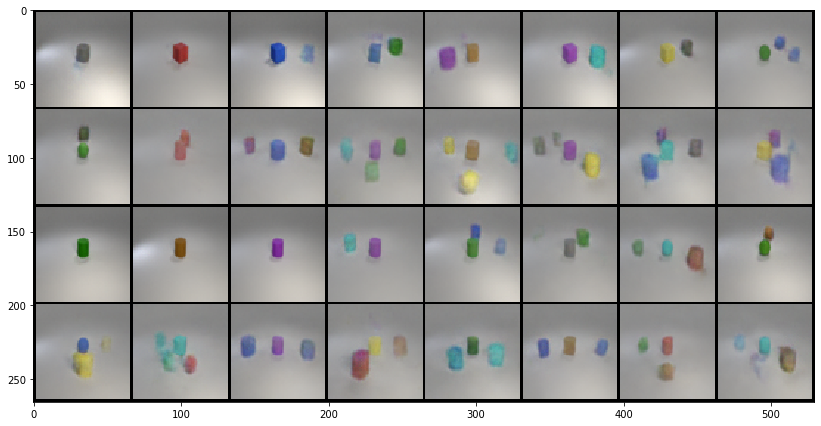

Score: 0.7361111111111112


In [6]:
test_labels = load_test('./', 'test.json')
print("Score:", test_eval(test_labels, 100, generator, 0, 3))

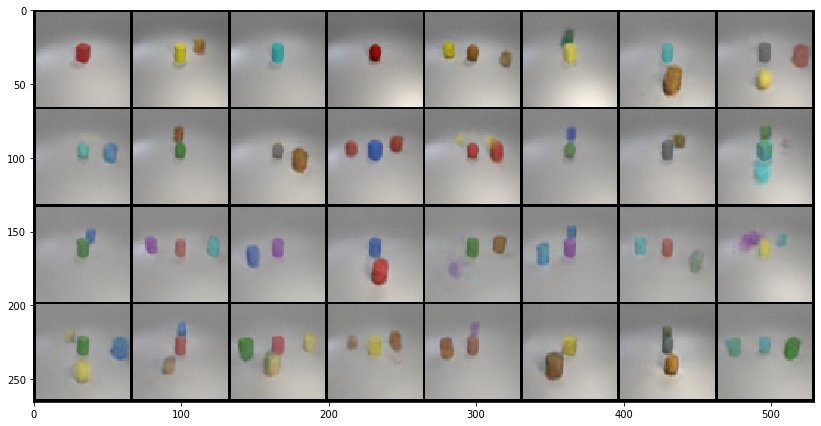

Score: 0.7105263157894737


In [7]:
test_labels = load_test('./', 'new_test_2021_summer.json')
print("Score:", test_eval(test_labels, 100, generator, 0, 30))